# [Q1] 입 력 변 수 의 속 성 이 numeric이 아 닌 변 수 들 을 모두 확 인 하고하고, 각 변 수 들 의 요 인 값 들 에 대 한 Bar chart를 도 시 하 시오시오.

In [1]:
data <- read.csv("Earthquate_Damage.csv")

In [2]:
str(data)

'data.frame':	260601 obs. of  40 variables:
 $ building_id                           : int  802906 28830 94947 590882 201944 333020 728451 475515 441126 989500 ...
 $ geo_level_1_id                        : int  6 8 21 22 11 8 9 20 0 26 ...
 $ geo_level_2_id                        : int  487 900 363 418 131 558 475 323 757 886 ...
 $ geo_level_3_id                        : int  12198 2812 8973 10694 1488 6089 12066 12236 7219 994 ...
 $ count_floors_pre_eq                   : int  2 2 2 2 3 2 2 2 2 1 ...
 $ age                                   : int  30 10 10 10 30 10 25 0 15 0 ...
 $ area_percentage                       : int  6 8 5 6 8 9 3 8 8 13 ...
 $ height_percentage                     : int  5 7 5 5 9 5 4 6 6 4 ...
 $ land_surface_condition                : Factor w/ 3 levels "n","o","t": 3 2 3 3 3 3 1 3 3 3 ...
 $ foundation_type                       : Factor w/ 5 levels "h","i","r","u",..: 3 3 3 3 3 3 3 5 3 2 ...
 $ roof_type                             : Factor w/ 3 level

In [3]:
# numeric이 아닌 변수들 저장
cat_cols <- c("land_surface_condition","foundation_type",
              "roof_type","ground_floor_type",
             "other_floor_type","position",
              "plan_configuration","legal_ownership_status")

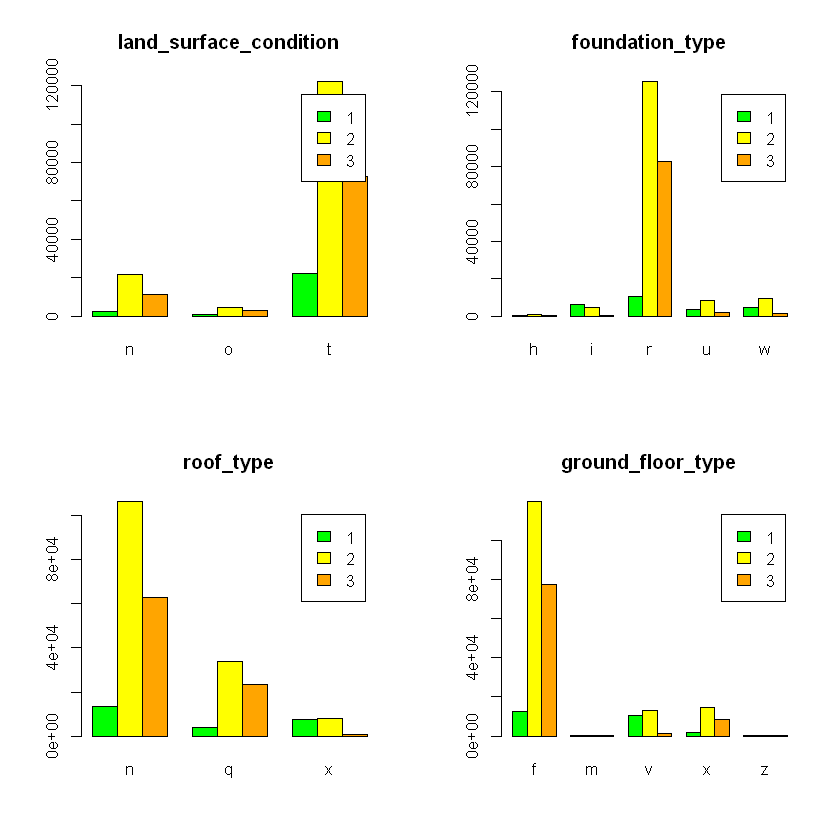

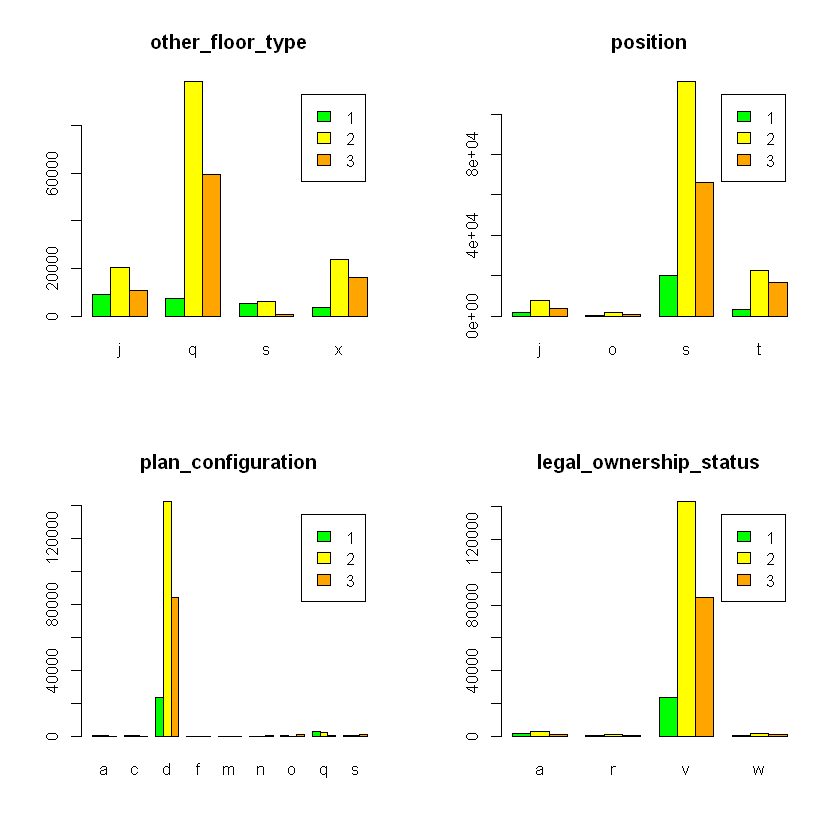

In [4]:
par(mfrow=c(2,2)) # 그래프들 2x2로 묶어서 출력
for (j in 1:length(cat_cols)){
    
    # damage_grade와 카테고리 칼럼으로 groupby연산을 실행한 후, function은 length로 사용하여
    # 개수를 셌습니다.
    tmp <- aggregate(data["building_id"],
                     list( data[,"damage_grade"],data[,cat_cols[j]]),length)
    
    # 결과를 담아둘 매트릭스 생성
    mat <- matrix(0,nrow=3,ncol = nrow(tmp)/3)
    
    # damage_grade는 1,2,3 3종류이므로 행 이름은 1,2,3입니다.
    rownames(mat) <- c("1","2","3")
    
    # coloum 이름은 category의 종류입니다. 
    # tmp에서 Group.2 칼럼에 category 종류들이 저장되어 있어, 그것을 가져와
    # col_names에 append 해주었습니다.
    col_names <- c()
    for (i in 1:(nrow(tmp)/3)){
        col_names <- append(col_names,as.vector(tmp[((i-1)*3+1),"Group.2"]))
    }
    colnames(mat) <- col_names
    
    # mat에 gorup_by하여 만들어둔 data_frame 중 length 값들만 저장합니다.
    for (i in 1:(nrow(tmp)/3)){
        mat[,i] <- tmp[((i-1)*3+1):(i*3),"building_id"]
    }
    
    # barplot을 그립니다.
    barplot(mat,col = c("green","yellow","orange"),main = cat_cols[j],
            beside=T,legen = row.names(mat))
}

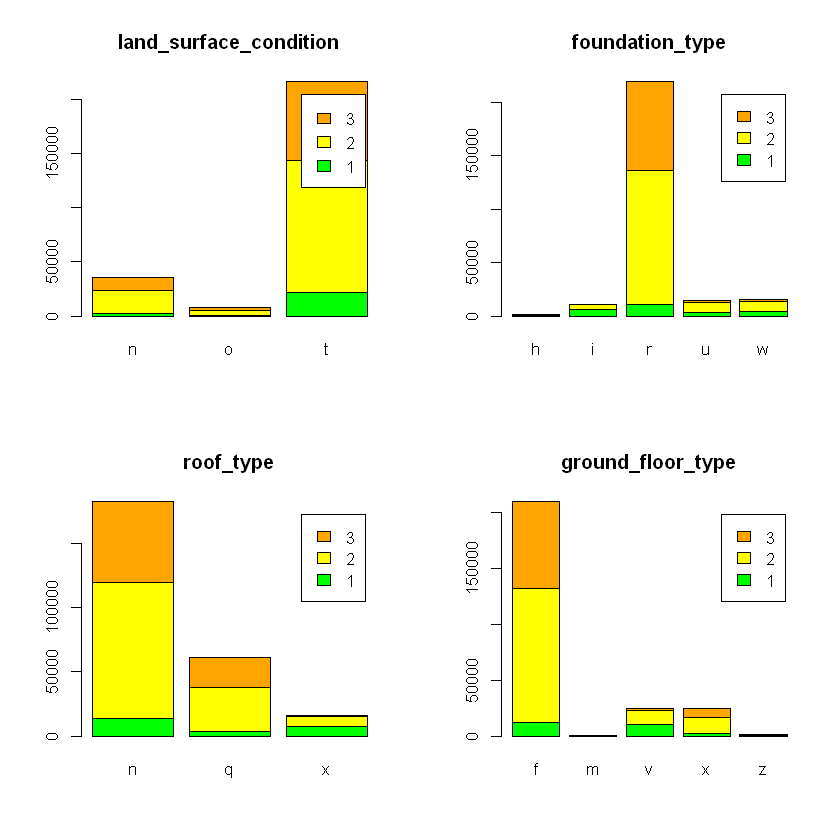

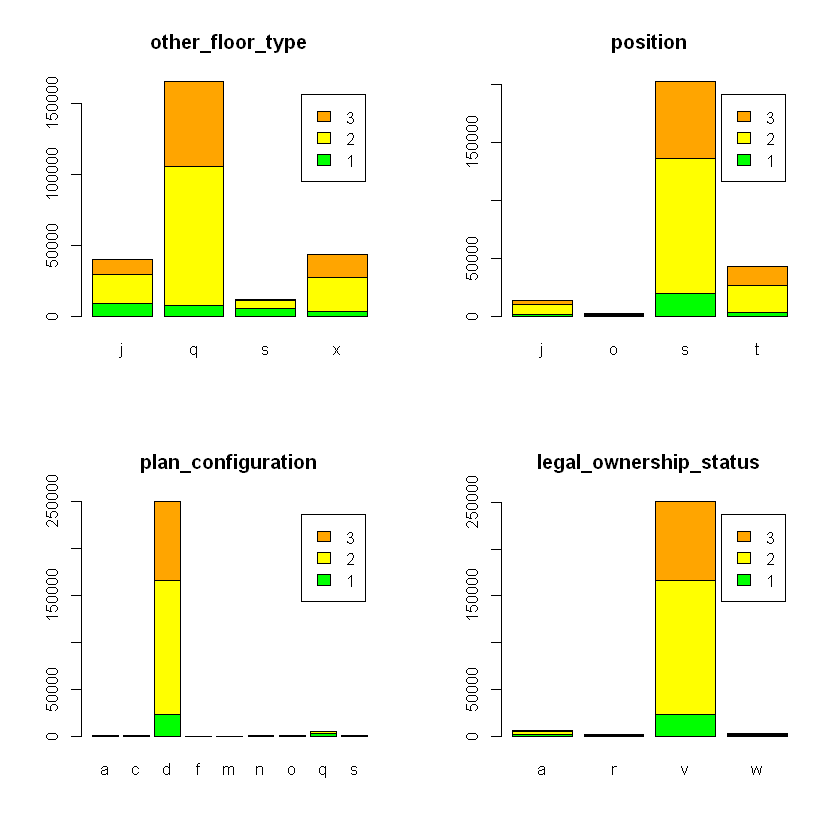

In [5]:
# 위와 같은 방식입니다.
par(mfrow=c(2,2))
for (j in 1:length(cat_cols)){
    tmp <- aggregate(data["building_id"],
                     list( data[,"damage_grade"],data[,cat_cols[j]]),length)
    mat <- matrix(0,nrow=3,ncol = nrow(tmp)/3)
    rownames(mat) <- c("1","2","3")
    col_names <- c()
    for (i in 1:(nrow(tmp)/3)){
        col_names <- append(col_names,as.vector(tmp[((i-1)*3+1),"Group.2"]))
    }
    colnames(mat) <- col_names
    for (i in 1:(nrow(tmp)/3)){
        mat[,i] <- tmp[((i-1)*3+1):(i*3),"building_id"]
    }
    
    # beside = T 파라미터를 제거하여, 한개의 bar로 출력했습니다.
    barplot(mat,col = c("green","yellow","orange"),main = cat_cols[j],
            legen = row.names(mat))
}

# [Q2] [Q1]에서 선택된 변수들에 대해 1-of-C coding (1-hot encoding) 방식을 통해 명목형(요인형) 변수를 범주의 개수만큼의 이진형(binary) 변수들로 구성되는dummy variable을 생성하시오.

In [6]:
install.packages("nnet")
library(nnet)

package 'nnet' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\lmwlm\AppData\Local\Temp\RtmpSEzYU5\downloaded_packages


In [7]:
j <- 1
for(i in 1:length(cat_cols)){
    tmp <- class.ind(data[,cat_cols[i]])
    colnames(tmp) <- (j:(j+length(colnames(tmp)) - 1))
    data <- cbind(data,tmp)
    j <- (j+length(colnames(tmp)))
}

In [8]:
head(data)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,29,30,31,32,33,34,35,36,37,38
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,1,0
2,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,1,0
3,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,1,0
4,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,1,0
5,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,1,0
6,333020,8,558,6089,2,10,9,5,t,r,...,0,0,0,0,0,0,0,0,1,0


In [9]:
ncol(data)

[1] 78

In [10]:
data <- data[,!(names(data)%in%cat_cols)]

In [11]:
ncol(data)

[1] 70

In [12]:
scaled_data <- scale(data[,1:31],center=TRUE,scale=TRUE)
other_data <- data[,32:70]

In [13]:
data <- cbind(scaled_data,other_data)

In [14]:
set.seed(42)
trn_idx <- sample(1:nrow(data), 150000)
train <- data[trn_idx,]
tmp <- data[-trn_idx,]
val_idx <- sample(1:nrow(tmp),50000)
val <- tmp[val_idx,]
test <- tmp[-val_idx,]

In [15]:
summary(train)

  building_id         geo_level_1_id       geo_level_2_id     
 Min.   :-1.7260749   Min.   :-1.7302734   Min.   :-1.698707  
 1st Qu.:-0.8662594   1st Qu.:-0.8589349   1st Qu.:-0.853079  
 Median : 0.0000477   Median :-0.2365502   Median :-0.002604  
 Mean   :-0.0004880   Mean   :-0.0004581   Mean   :-0.002459  
 3rd Qu.: 0.8665206   3rd Qu.: 0.8837423   3rd Qu.: 0.843025  
 Max.   : 1.7312992   Max.   : 2.0040347   Max.   : 1.758920  
 geo_level_3_id       count_floors_pre_eq      age           
 Min.   :-1.7161936   Min.   :-1.55253    Min.   :-0.360697  
 1st Qu.:-0.8739860   1st Qu.:-0.17827    1st Qu.:-0.224765  
 Median : 0.0003082   Median :-0.17827    Median :-0.156799  
 Mean   :-0.0011825   Mean   :-0.00114    Mean   : 0.001964  
 3rd Qu.: 0.8641811   3rd Qu.:-0.17827    3rd Qu.: 0.047100  
 Max.   : 1.7302480   Max.   : 8.06728    Max.   :13.164584  
 area_percentage     height_percentage   has_superstructure_adobe_mud
 Min.   :-1.597833   Min.   :-1.790207   Min.   :-0.311

In [16]:
summary(val)

  building_id        geo_level_1_id     geo_level_2_id      geo_level_3_id     
 Min.   :-1.725983   Min.   :-1.73027   Min.   :-1.698707   Min.   :-1.715919  
 1st Qu.:-0.871926   1st Qu.:-0.85893   1st Qu.:-0.845810   1st Qu.:-0.880568  
 Median :-0.002448   Median :-0.23655   Median : 0.011934   Median :-0.005451  
 Mean   :-0.001342   Mean   : 0.00253   Mean   : 0.004132   Mean   :-0.005838  
 3rd Qu.: 0.864620   3rd Qu.: 0.88374   3rd Qu.: 0.845448   3rd Qu.: 0.856022  
 Max.   : 1.731224   Max.   : 2.00403   Max.   : 1.758920   Max.   : 1.729699  
 count_floors_pre_eq      age            area_percentage    
 Min.   :-1.552533   Min.   :-0.360697   Min.   :-1.597833  
 1st Qu.:-0.178273   1st Qu.:-0.224765   1st Qu.:-0.687134  
 Median :-0.178273   Median :-0.156799   Median :-0.231784  
 Mean   :-0.001846   Mean   : 0.003766   Mean   : 0.002912  
 3rd Qu.:-0.178273   3rd Qu.: 0.047100   3rd Qu.: 0.223565  
 Max.   : 6.693025   Max.   :13.164584   Max.   :17.754519  
 height_perce

In [17]:
summary(test)

  building_id        geo_level_1_id       geo_level_2_id     
 Min.   :-1.726088   Min.   :-1.7302734   Min.   :-1.698707  
 1st Qu.:-0.870185   1st Qu.:-0.8589349   1st Qu.:-0.845810  
 Median : 0.003518   Median :-0.2365502   Median : 0.014357  
 Mean   : 0.002315   Mean   :-0.0009537   Mean   : 0.002678  
 3rd Qu.: 0.870822   3rd Qu.: 0.8837423   3rd Qu.: 0.845448  
 Max.   : 1.731283   Max.   : 2.0040347   Max.   : 1.758920  
 geo_level_3_id      count_floors_pre_eq      age           
 Min.   :-1.715919   Min.   :-1.552533   Min.   :-0.360697  
 1st Qu.:-0.863290   1st Qu.:-0.178273   1st Qu.:-0.224765  
 Median : 0.014295   Median :-0.178273   Median :-0.156799  
 Mean   : 0.007743   Mean   : 0.004346   Mean   :-0.007968  
 3rd Qu.: 0.872134   3rd Qu.:-0.178273   3rd Qu.: 0.047100  
 Max.   : 1.729699   Max.   : 9.441544   Max.   :13.164584  
 area_percentage     height_percentage   has_superstructure_adobe_mud
 Min.   :-1.597833   Min.   :-1.790207   Min.   :-0.311877           

# [Q3] Training 및 Validation 데이터셋을 바탕으로 실습시간에 사용한 "nnet” package 를 사용하여 다음hyper-parameter 조합들에 대한Grid search 를 수행하여 최적의 조합을 찾아보시오(합계최소21 가지이상탐색). 아래두가지이외의hyper-parameter 는 nnet package 의default value 를 사용하시오. 성능이 가장 우수한 조합과 가장 열등한 조합과의 Accuracy 와BCR 의 차이는 얼마인가?

In [18]:
perf_eval_multi <- function(cm){
  
  # Simple Accuracy
  ACC = sum(diag(cm))/sum(cm)
  
  # Balanced Correction Rate
  BCR = 1
  for (i in 1:dim(cm)[1]){
    BCR = BCR*(cm[i,i]/sum(cm[i,])) 
  }
  
  BCR = BCR^(1/dim(cm)[1])
  
  return(c(ACC, BCR))
}

In [48]:
x_train <- train[,!(names(train)%in%"damage_grade")]
y_train <- train[,(names(train)%in%"damage_grade")]
y_train <- class.ind(y_train)

In [49]:
x_val <- val[,!(names(val)%in%"damage_grade")]
y_val <- val[,(names(val)%in%"damage_grade")]
y_val <- class.ind(y_val)

In [22]:
if(!require(parallel)) {
  install.packages("parallel")
}
library(parallel)

# 코어 개수 획득
numCores <- parallel::detectCores() - 1

# 클러스터 초기화
myCluster <- parallel::makeCluster(numCores)

Loading required package: parallel



In [23]:
# 다른 클러스터에서도 사용 가능하도록 전역변수 선언
parallel::clusterExport(myCluster, "x_train")
parallel::clusterExport(myCluster, "y_train")
parallel::clusterExport(myCluster, "x_val")
parallel::clusterExport(myCluster, "y_val")
parallel::clusterExport(myCluster, "val_perf")
parallel::clusterExport(myCluster, "perf_eval_multi")
parallel::clusterExport(myCluster, "nnet")

In [61]:
# 테스트 샘플
tmp_nnet <- nnet(x_train, y_train, size=3, maxit=10,MaxNWts=100000)

# weights:  222
initial  value 92132.567603 
iter  10 value 80456.195034
final  value 80456.195034 
stopped after 10 iterations


In [62]:
tmp_pred <- predict(tmp_nnet, x_val,method="class")

In [64]:
# 확률값으로 나옴
head(tmp_pred)

,1,2,3
173340,0.39902840,0.5447823,0.2489356
198699,0.13158674,0.5753304,0.2986020
79340,0.05544178,0.5866230,0.3369151
134450,0.23464360,0.5608179,0.2742101
182493,0.28866064,0.5550121,0.2648575
88320,0.09809767,0.5821119,0.3104999


In [91]:
# 확률값을 class예측으로 바꿔주는 코드
prediction_one <- function(pred){
    tmp <- apply(pred,1,which.max)
    for (i in 1:nrow(pred)){
        pred[i,tmp[i]] <- 1
        pred[i,-tmp[i]] <- 0
    }
    return(pred)
}

In [92]:
parallel::clusterExport(myCluster, "prediction_one")

In [93]:
# 병렬 처리에 들어갈 함수 작성
# size를 입력 받으면서, maxit은 고정시켜 두었습니다.
nnet_parallel <- function(nh){
    tmp_nnet <- nnet(x_train, y_train, size=nh, maxit=50,MaxNWts=100000)
    tmp_pred <- predict(tmp_nnet, x_val)
    tmp_pred <- prediction_one(tmp_pred)
    cfm <- table(y_val,tmp_pred)
    return(perf_eval_multi(cfm))
}

In [94]:
# c(5,10,15,20,25,30,35)에 있는 것을 nnet_parallel에 넣고
# 7개의 코어에서 병렬적으로 동시에 학습시켜 줍니다.
result1 <- parLapply(myCluster, c(5,10,15,20,25,30,35),nnet_parallel)

In [95]:
result1

[[1]]
[1] 0.7405022 0.7013462

[[2]]
[1] 0.7361467 0.6961687

[[3]]
[1] 0.7542622 0.7176527

[[4]]
[1] 0.7126978 0.6681545

[[5]]
[1] 0.7126978 0.6681545

[[6]]
[1] 0.7632178 0.7282266

[[7]]
[1] 0.7126978 0.6681545

In [99]:
nnet_parallel <- function(nh){
    tmp_nnet <- nnet(x_train, y_train, size=nh, maxit=75,MaxNWts=100000)
    tmp_pred <- predict(tmp_nnet, x_val)
    tmp_pred <- prediction_one(tmp_pred)
    cfm <- table(y_val,tmp_pred)
    return(perf_eval_multi(cfm))
}

In [100]:
result2 <- parLapply(myCluster, c(5,10,15,20,25,30,35),nnet_parallel)

In [101]:
result2

[[1]]
[1] 0.7484400 0.7107621

[[2]]
[1] 0.7562711 0.7200273

[[3]]
[1] 0.7523778 0.7154239

[[4]]
[1] 0.7126978 0.6681545

[[5]]
[1] 0.7126978 0.6681545

[[6]]
[1] 0.7695467 0.7356815

[[7]]
[1] 0.7717333 0.7382539

In [102]:
nnet_parallel <- function(nh){
    tmp_nnet <- nnet(x_train, y_train, size=nh, maxit=100,MaxNWts=100000)
    tmp_pred <- predict(tmp_nnet, x_val)
    tmp_pred <- prediction_one(tmp_pred)
    cfm <- table(y_val,tmp_pred)
    return(perf_eval_multi(cfm))
}

In [103]:
result3 <- parLapply(myCluster, c(5,10,15,20,25,30,35),nnet_parallel)

In [104]:
result3

[[1]]
[1] 0.7514489 0.7143248

[[2]]
[1] 0.7576978 0.7217127

[[3]]
[1] 0.7601422 0.7245987

[[4]]
[1] 0.7777911 0.7453716

[[5]]
[1] 0.7781822 0.7458308

[[6]]
[1] 0.7126978 0.6681545

[[7]]
[1] 0.7126978 0.6681545

In [118]:
val_perf <- matrix(0, 21, 4)
colnames(val_perf) <- c("nH","nMaxit","ACC","BCR")

In [119]:
val_perf[1:7,1] <- c(5,10,15,20,25,30,35)
val_perf[8:14,1] <- c(5,10,15,20,25,30,35)
val_perf[15:21,1] <- c(5,10,15,20,25,30,35)
val_perf[1:7,2] <- 50
val_perf[8:14,2] <- 75
val_perf[15:21,2] <- 100

In [132]:
val_perf[1,3:4] <- c(0.740502222222222,0.70134619394102)
val_perf[2,3:4] <- c(0.736146666666667,0.696168732564168)
val_perf[3,3:4] <- c(0.754262222222222,0.717652727546935)
val_perf[4,3:4] <- c(0.712697777777778,0.668154463994334)
val_perf[5,3:4] <- c(0.712697777777778,0.668154463994334)
val_perf[6,3:4] <- c(0.763217777777778,0.728226646282293)
val_perf[7,3:4] <- c(0.712697777777778,0.668154463994334)
val_perf[8,3:4] <- c(0.74844,0.710762082415769)
val_perf[9,3:4] <- c(0.756271111111111,0.720027251351564)
val_perf[10,3:4] <- c(0.752377777777778,0.715423902700738)
val_perf[11,3:4] <- c(0.712697777777778,0.668154463994334)
val_perf[12,3:4] <- c(0.712697777777778,0.668154463994334)
val_perf[13,3:4] <- c(0.769546666666667,0.735681541973156)
val_perf[14,3:4] <- c(0.771733333333333,0.738253940050441)
val_perf[15,3:4] <- c(0.751448888888889,0.714324759257922)
val_perf[16,3:4] <- c(0.757697777777778,0.72171265941201)
val_perf[17,3:4] <- c(0.760142222222222,0.724598663230588)
val_perf[18,3:4] <- c(0.777791111111111,0.745371644945586)
val_perf[19,3:4] <- c(0.778182222222222,0.745830756509515)
val_perf[20,3:4] <- c(0.712697777777778,0.668154463994334)
val_perf[21,3:4] <- c(0.712697777777778,0.668154463994334)

In [133]:
val_perf

nH,nMaxit,ACC,BCR
5,50,0.7405022,0.7013462
10,50,0.7361467,0.6961687
15,50,0.7542622,0.7176527
20,50,0.7126978,0.6681545
25,50,0.7126978,0.6681545
30,50,0.7632178,0.7282266
35,50,0.7126978,0.6681545
5,75,0.7484400,0.7107621
10,75,0.7562711,0.7200273
15,75,0.7523778,0.7154239


# [Q4] [Q3]에서 선택된 최적의 모델구조에 nnet의 rang 옵션(default value = 0.7)을 세 가지 이상변경해 가면서 성능변화를 살펴보시오. [Q3]의 방식과 마찬가지로 Training/Validation 데이터셋을 사용하여 탐색하시오.

In [134]:
nnet_parallel <- function(rang){
    tmp_nnet <- nnet(x_train, y_train, size=25, maxit=100,MaxNWts=100000,rang=rang)
    tmp_pred <- predict(tmp_nnet, x_val)
    tmp_pred <- prediction_one(tmp_pred)
    cfm <- table(y_val,tmp_pred)
    return(perf_eval_multi(cfm))
}

In [135]:
result <- parLapply(myCluster, c(0.3,0.4,0.5,0.6,0.7,0.8,0.9),nnet_parallel)

In [136]:
result

[[1]]
[1] 0.7769911 0.7444324

[[2]]
[1] 0.7799911 0.7479535

[[3]]
[1] 0.7506800 0.7134147

[[4]]
[1] 0.7568044 0.7206574

[[5]]
[1] 0.7126978 0.6681545

[[6]]
[1] 0.7760533 0.7433311

[[7]]
[1] 0.7126978 0.6681545

In [142]:
val_perf2 <- matrix(0, 7, 3)
colnames(val_perf2) <- c("rang","ACC","BCR")

In [143]:
val_perf2[1:7,1] <- c(0.3,0.4,0.5,0.6,0.7,0.8,0.9)

In [144]:
val_perf2

rang,ACC,BCR
0.3,0,0
0.4,0,0
0.5,0,0
0.6,0,0
0.7,0,0
0.8,0,0
0.9,0,0


In [145]:
val_perf2[1,2:3] <- c(0.776991111111111,0.744432391214198)
val_perf2[2,2:3] <- c(0.779991111111111,0.74795347454831)
val_perf2[3,2:3] <- c(0.75068,0.713414690204793)
val_perf2[4,2:3] <- c(0.756804444444444,0.720657399894168)
val_perf2[5,2:3] <- c(0.712697777777778,0.668154463994334)
val_perf2[6,2:3] <- c(0.776053333333333,0.74333109930905)
val_perf2[7,2:3] <- c(0.712697777777778,0.668154463994334)

In [146]:
val_perf2

rang,ACC,BCR
0.3,0.7769911,0.7444324
0.4,0.7799911,0.7479535
0.5,0.7506800,0.7134147
0.6,0.7568044,0.7206574
0.7,0.7126978,0.6681545
0.8,0.7760533,0.7433311
0.9,0.7126978,0.6681545


# [Q5] [Q3]에서 확인된 최적의 hidden node의 수와 최적의 maxit, 그리고 [Q4]에서 확인된 가장우수한 rang option으로 ANN 모델구조를 확정하고 Training dataset과 Validation dataset을 결합한 데이터셋에 대해 학습을 수행하시오. 학습이 완료된 ANN 모델을 Test dataset에 적용하여Accuracy와 BCR을 살펴보시오. 동일한 과정을 10회 반복 수행하여 수행 회차에따라 정확도의 변동성은 어느정도 되는지 확인하시오.

In [147]:
all_x_train <- rbind(x_train,x_val)
all_y_train <- rbind(y_train,y_val)

In [148]:
parallel::clusterExport(myCluster, "all_x_train")
parallel::clusterExport(myCluster, "all_y_train")

In [149]:
x_test <- test[,!(names(test)%in%"damage_grade")]
y_test <- test[,(names(test)%in%"damage_grade")]
y_test <- class.ind(y_test)

In [150]:
parallel::clusterExport(myCluster, "x_test")
parallel::clusterExport(myCluster, "y_test")

In [154]:
nnet_parallel <- function(rang){
    tmp_nnet <- nnet(all_x_train, all_y_train, size=25, maxit=100,MaxNWts=100000,rang=rang)
    tmp_pred <- predict(tmp_nnet, x_test)
    tmp_pred <- prediction_one(tmp_pred)
    cfm <- table(y_test,tmp_pred)
    return(perf_eval_multi(cfm))
}

In [155]:
test_result1 <- parLapply(myCluster, c(0.4,0.4,0.4,0.4,0.4,0.4,0.4),nnet_parallel)

In [156]:
test_result2 <- parLapply(myCluster, c(0.4,0.4,0.4,0.4,0.4,0.4,0.4),nnet_parallel)

In [157]:
test_result1

[[1]]
[1] 0.7687167 0.7347047

[[2]]
[1] 0.7716099 0.7381088

[[3]]
[1] 0.7124800 0.6678931

[[4]]
[1] 0.7769564 0.7443916

[[5]]
[1] 0.7631062 0.7280951

[[6]]
[1] 0.7744812 0.7414841

[[7]]
[1] 0.7124800 0.6678931

In [158]:
test_result2

[[1]]
[1] 0.7124800 0.6678931

[[2]]
[1] 0.7714669 0.7379406

[[3]]
[1] 0.7727430 0.7394412

[[4]]
[1] 0.7759993 0.7432676

[[5]]
[1] 0.7762303 0.7435390

[[6]]
[1] 0.7767144 0.7441074

[[7]]
[1] 0.7791236 0.7469355

In [159]:
test_perf <- matrix(0, 14, 2)
colnames(test_perf) <- c("ACC","BCR")

In [160]:
test_perf[1,] <- c(0.768716687843435,0.734704712411799)
test_perf[2,] <- c(0.771609929429107,0.738108812163079)
test_perf[3,] <- c(0.712479992079339,0.667893110087644)
test_perf[4,] <- c(0.776956375857384,0.744391604757617)
test_perf[5,] <- c(0.763106219369317,0.728095110404643)
test_perf[6,] <- c(0.774481169177626,0.741484131041984)
test_perf[7,] <- c(0.712479992079339,0.667893110087644)
test_perf[8,] <- c(0.712479992079339,0.667893110087644)
test_perf[9,] <- c(0.77146691748761,0.737940617783751)
test_perf[10,] <- c(0.772743024042507,0.739441176738998)
test_perf[11,] <- c(0.775999295941211,0.74326763061088)
test_perf[12,] <- c(0.776230315231322,0.743538963383649)
test_perf[13,] <- c(0.776714355648697,0.744107410966062)
test_perf[14,] <- c(0.779123556816994,0.746935543661941)

In [161]:
test_perf

ACC,BCR
0.7687167,0.7347047
0.7716099,0.7381088
0.7124800,0.6678931
0.7769564,0.7443916
0.7631062,0.7280951
0.7744812,0.7414841
0.7124800,0.6678931
0.7124800,0.6678931
0.7714669,0.7379406
0.7727430,0.7394412


# [Q6] Training dataset과 Validation dataset을 결합하여 Multinomial logistic regression을 학습하고, 이를 Test dataset에 적용하여 Accuracy와 BCR을 산출하고 이를 ANN의 결과와 비교해보시오.

In [164]:
y_train_logistic <- apply(y_train,1,which.max)
y_test_logistic <- apply(y_test,1,which.max)

In [165]:
logistic_train <- cbind(x_train,y_train_logistic)
logistic_test <- cbind(x_test,y_test_logistic)

In [170]:
ncol(logistic_train)

[1] 70

In [172]:
colnames(logistic_train)[70] <- "damage_grade"
colnames(logistic_test)[70] <- "damage_grade"

In [166]:
install.packages("moments") 
library(moments)

package 'moments' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\lmwlm\AppData\Local\Temp\RtmpSEzYU5\downloaded_packages


In [173]:
set.seed(43)
mult_lr <- multinom(damage_grade ~ ., data = logistic_train)

# weights:  213 (140 variable)
initial  value 164791.843301 
iter  10 value 139723.747933
iter  20 value 139212.819038
iter  30 value 138954.455125
iter  40 value 138102.096694
iter  50 value 135624.168252
iter  60 value 127265.680659
iter  70 value 123407.093828
iter  80 value 121926.697575
iter  90 value 121313.458677
iter 100 value 120532.524561
final  value 120532.524561 
stopped after 100 iterations


In [174]:
summary(mult_lr)

Call:
multinom(formula = damage_grade ~ ., data = logistic_train)

Coefficients:
  (Intercept)   building_id geo_level_1_id geo_level_2_id geo_level_3_id
2   0.9067929 -0.0004903529    -0.23333079    -0.04193149    -0.03513217
3   0.4454732  0.0028989910    -0.08666071    -0.02799521    -0.01042660
  count_floors_pre_eq         age area_percentage height_percentage
2          0.08769552 -0.01324174     0.048207265        0.06031602
3          0.31903978 -0.03240084    -0.008282707        0.08571839
  has_superstructure_adobe_mud has_superstructure_mud_mortar_stone
2                    0.1732084                           0.3535854
3                    0.1986563                           0.4312052
  has_superstructure_stone_flag has_superstructure_cement_mortar_stone
2                     0.1468470                             0.01659564
3                     0.2408578                            -0.06023005
  has_superstructure_mud_mortar_brick has_superstructure_cement_mortar_brick
2    

In [176]:
mult_lr_pred <- predict(mult_lr, newdata = logistic_test) # 예측 확률값 담기
mult_lr_pred

[1] 3 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
   [37] 2 2 2 2 2 1 2 2 2 3 2 2 2 2 3 3 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 1 2 2
   [73] 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 1
  [109] 2 3 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 2 2 2 2
  [145] 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 1 1 3 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2
  [181] 2 1 2 2 1 2 2 1 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 3 2 2 2 3 2 2 2 2 2
  [217] 2 3 2 2 2 2 3 2 2 3 1 1 2 2 2 3 2 2 2 2 2 2 3 3 2 2 2 2 3 1 2 2 3 2 2 2
  [253] 3 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2
  [289] 2 2 2 3 2 2 2 3 2 2 2 1 2 3 2 2 2 2 2 2 2 3 2 2 2 2 2 2 1 2 3 2 2 2 2 2
  [325] 2 3 2 2 2 2 2 2 2 2 3 2 2 2 1 2 3 2 2 2 3 2 1 2 2 3 2 2 2 3 1 2 2 2 2 2
  [361] 2 2 1 2 2 2 2 1 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2
  [397] 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 1 2 2 3 2 2 2 3 2 3 2 2 2 1 2 2 2 2 2 3 2
  [433] 2 3 2 2 2 2 2 2 2 2 2 2 2 2 3 2 1 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 3
  [469] 2 2 2 2 3 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2
  [505] 1 3 2 2 2 2 2 3 2 2 2 1 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 1 3 2 2 2 2 2 2
  [541] 2 2 2 2 2 2 2 2 2 3 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 3 2 2 1 2 2 2 2 2 2 2
  [577] 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2
  [613] 2 2 2 2 3 2 2 2 2 3 2 1 2 2 2 2 1 2 1 3 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  [649] 2 2 2 2 2 2 2 2 2 3 2 1 2 3 2 2 3 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  [685] 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  [721] 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 3 3 2 2 2 2 3 2 2 2 2 2 2
  [757] 2 2 2 2 2 2 2 2 1 2 2 3 3 2 2 2 2 3 2 2 2 2 3 3 2 2 2 2 3 2 2 2 2 2 2 2
  [793] 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 3 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 3 1 3
  [829] 2 2 2 2 2 2 3 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1
  [865] 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 3 2 2 2
  [901] 3 2 2 3 3 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1
  [937] 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 3 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 3
  [973] 2 2 2 2 2 3 2 2 3 3 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2
 [1009] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [1045] 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 3 1 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2
 [1081] 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 1 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [1117] 2 2 2 2 2 2 1 2 2 2 2 3 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2
 [1153] 2 1 2 1 2 2 2 2 2 2 2 2 3 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [1189] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 3 1 2 2 2 2 2 2 2 2 2 3 3 2 2 2
 [1225] 2 2 2 2 2 3 2 2 2 2 2 2 2 2 1 2 2 2 3 2 2 3 2 2 2 2 2 2 2 3 2 2 2 2 2 2
 [1261] 2 2 2 2 3 3 3 2 2 2 2 2 2 1 2 2 3 1 2 2 2 1 1 2 3 2 2 2 2 2 3 2 2 2 2 2
 [1297] 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2
 [1333] 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2
 [1369] 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 3
 [1405] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 1 2 2 2 2 2 1
 [1441] 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 3 1 2 3 2 1
 [1477] 3 2 2 1 2 2 2 2 3 2 1 2 2 2 2 2 2 2 2 2 3 2 2 2 2 1 2 2 2 2 2 2 2 2 3 2
 [1513] 1 2 2 2 3 2 2 2 2 2 1 2 2 2 1 3 2 3 2 1 1 2 3 1 2 2 2 2 2 3 2 2 2 2 2 2
 [1549] 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 3 2 2 2 2 2 2 2 2 1 2 1 2 2 2
 [1585] 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 2 2 2 2 3 3 2
 [1621] 2 2 2 2 2 2 3 2 2 2 3 2 2 2 2 3 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2
 [1657] 3 3 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 3 2 2 2 2 2 2 2 3 2 2 2 3
 [1693] 2 2 2 2 1 2 1 3 2 3 1 2 2 2 2 2 2 2 2 2 3 2 2 2 2 1 1 2 3 2 2 3 2 2 2 2
 [1729] 2 2 3 2 2 2 2 2 2 2 2 3 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 [1765] 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 1 2 2 2 2 2 3 2 2 2 2
 [18

In [178]:
cfmatrix <- table(logistic_test$damage_grade, mult_lr_pred) # 예측 결과를 이용하여 평가지표 계산
cfmatrix
perf_eval_multi(cfmatrix)

   mult_lr_pred
        1     2     3
  1  1871  3895   117
  2  1471 30728  2266
  3   132 17129  2992

[1] 0.5873005 0.3472970